EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - ` Eduardo Andrés Mendes Allendes`
  - ` Macarena Constanza Ramirez Calderon`
- Usuario de GitHub (opcional):  `https://github.com/macarenaramirez21/Macarena-Ramirez-EAE3709-.git1`


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.13                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# 1. Clasificación

En esta pregunta trabajaremos con un _dataset_ que contiene información campañas de marketing de un banco portugués. La campaña se enfocó en llamadas telefónicas a distintos segmentos de clientes, de forma individualizada, con el objetivo incenitvar la toma depósitos por parte de los clientes.

El problema presentado en este ejecicio busca predecir si el cliente suscribirá (sí/no) un depósito a plazo.



A continuación, se despliega información oficial sobre el _dataset_:

| Variable Name | Role    | Type        | Description                                                                                                                               |
|---------------|---------|-------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| age           | Feature | Integer     |     years of age                                                                                                                                      |
| job           | Feature | Categorical | type of job |
| marital       | Feature | Categorical | marital status                          |
| education     | Feature | Categorical | Education level         |
| default       | Feature | Binary      | has credit in default?                                                                                                                    |
| balance       | Feature | Integer     | average yearly balance in euros                                                                                                                    |
| housing       | Feature | Binary      | has housing loan?                                                                                                                         |
| loan          | Feature | Binary      | has personal loan?                                                                                                                        |
| contact       | Feature | Categorical | contact communication type                                                                         |
| day_of_week   | Feature | Date        | last contact day of the month (numeric)                                                                                                              |
| month         | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                          |
| duration*      | Feature | Integer     | last contact duration, in seconds (numeric).  |
| campaign      | Feature | Integer     | number of contacts performed during this campaign and for this client                                      |
| pdays         | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |
| previous      | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                       |
| poutcome      | Feature | Categorical | outcome of the previous marketing campaign                                                |
| y             | Target  | Binary      | has the client subscribed a term deposit?                                                                                                 |


*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



En el sitio web [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) podrá encontrar información oficial del _dataset_.

Use el código otorgado a continuación para importar los datos.


In [87]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [88]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


## Exploratory Data Analysis (EDA)

### Pregunta 1.0

Concatene `X` e `y` en un dataframe consolidado.

Muestre las primeras cinco observaciones en el dataframe consolidado. Despliegue información sobre el tipo de variable de cada una de las columnas del dataframe y despliegue estadísticas descriptivas de las variables según su tipo.

In [89]:
import pandas as pd

df = pd.merge(X, y, left_index=True, right_index=True)

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [90]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [128]:
df.describe

<bound method NDFrame.describe of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact 

In [91]:
df.select_dtypes(include=['int64', 'float64']).describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [92]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts(normalize=True).round(3))
    print(df[col].value_counts())


job
blue-collar      0.217
management       0.211
technician       0.169
admin.           0.115
services         0.092
retired          0.050
self-employed    0.035
entrepreneur     0.033
unemployed       0.029
housemaid        0.028
student          0.021
Name: proportion, dtype: float64
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64
marital
married     0.602
single      0.283
divorced    0.115
Name: proportion, dtype: float64
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
education
secondary    0.535
tertiary     0.307
primary      0.158
Name: proportion, dtype: float64
education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64
default
no     0.982
yes    0.018
Name: proportion, dtype: flo

### Pregunta 1.1

Identifique las columnas que presentan _missing values_ e indique el número de _missing values_ que poseen.

Impute los valores nulos con el método que estime conveniente, justificando su decisión.

In [93]:
df.isnull().sum()


age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [94]:
(df.isnull().sum() / len(df) * 100).round(2)

age             0.00
job             0.64
marital         0.00
education       4.11
default         0.00
balance         0.00
housing         0.00
loan            0.00
contact        28.80
day_of_week     0.00
month           0.00
duration        0.00
campaign        0.00
pdays           0.00
previous        0.00
poutcome       81.75
y               0.00
dtype: float64

In [95]:
df = df.drop("poutcome", axis = 1)

In [96]:
col_con_missings = ["job", "education", "contact"]

for col in col_con_missings:
  df[col].fillna("unknown")

df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
y                  0
dtype: int64




---


Las columnas:
- job
- education
- contact
- poutcome
tienen observaciones faltantes. 
La variable "poutcome" tiene mas del 80% de las observaciones faltantes, por lo que un buen método de imputación es eliminar la columna.
Las otras variables son categoricas, por lo que no pueden ser reemplazadas con la media. Una buena alternativa de imputación es reemplazafr los missings con "unknown".




---

### Pregunta 1.2

Genere histogramas de las variables categóricas desagregando por la variable objetivo de interés. Interprete las relaciones que observa.

Responda: ¿Cuáles creen que son las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito?

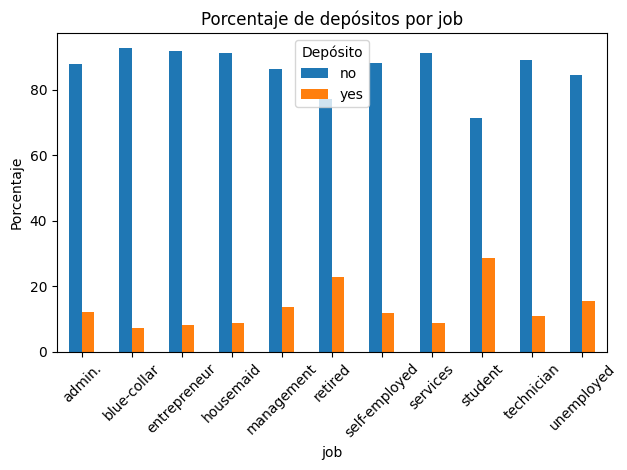

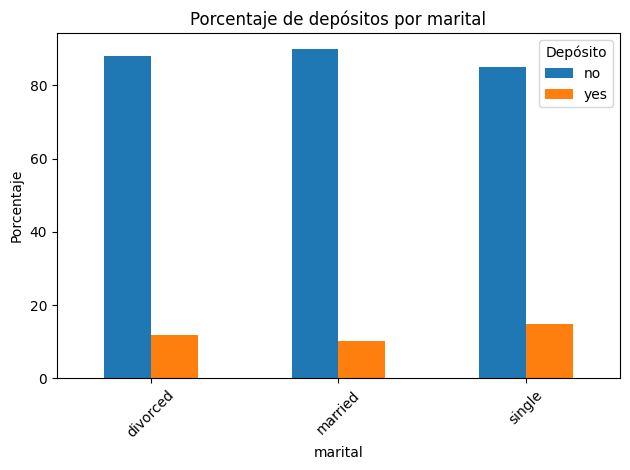

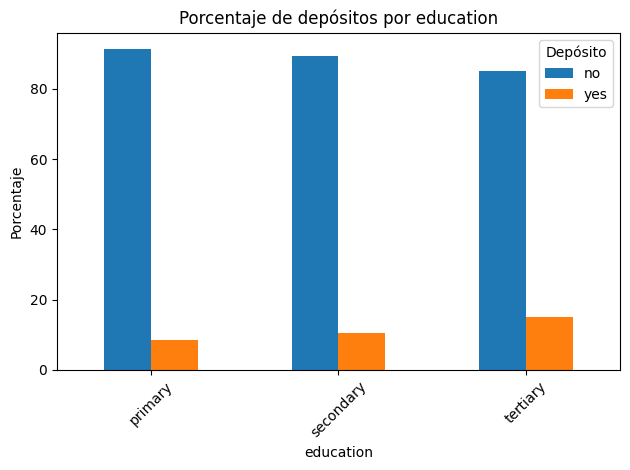

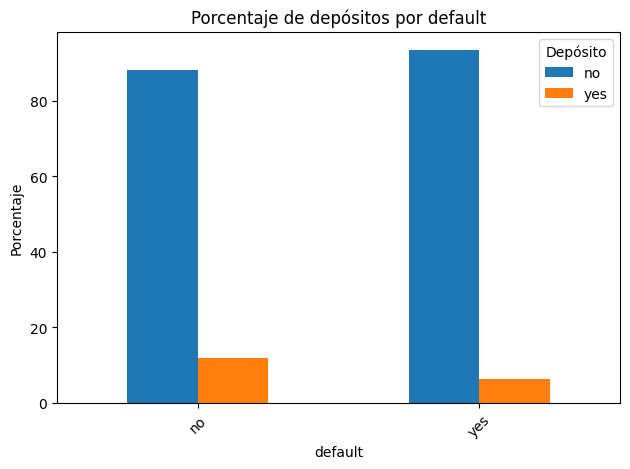

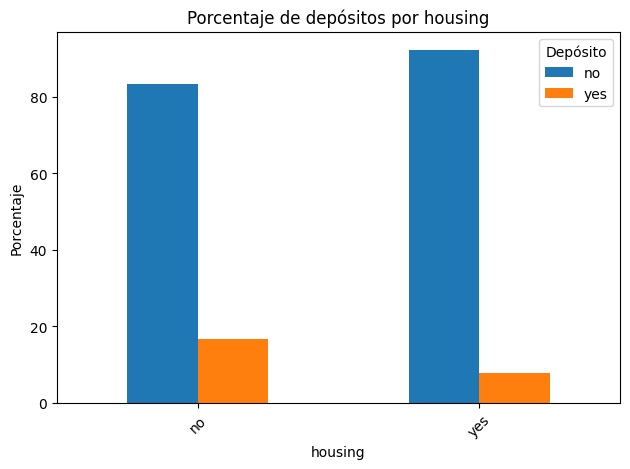

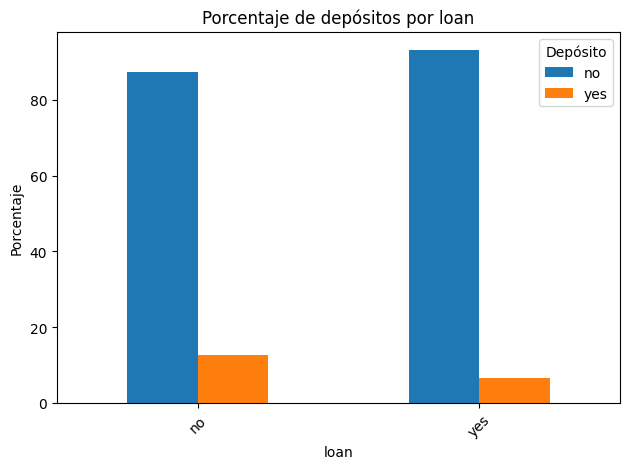

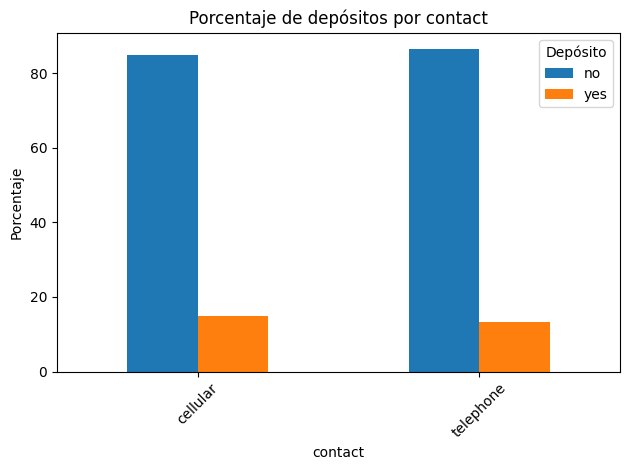

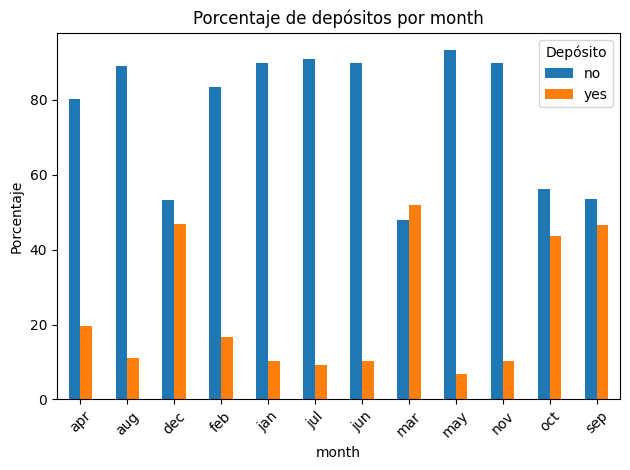

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

var_categoricas = df.select_dtypes(include='object').columns.tolist()
var_categoricas.remove("y")

for var in var_categoricas:
    prop_df = pd.crosstab(df[var], df['y'], normalize='index') * 100

    prop_df.plot(kind="bar")
    plt.title(f'Porcentaje de depósitos por {var}')
    plt.xlabel(var)
    plt.ylabel('Porcentaje')
    plt.xticks(rotation=45)
    plt.legend(title='Depósito')
    plt.tight_layout()
    plt.show()






---
Los graficos permiten notar que variables son las mas relevantes
- job: hay ocupaciones como "retired y "student" que muestras mayores proporciones relativas de suscribir el deposito. Esto suguere que es una variable relevante.
- marital: parece no ser muy relevante, pero hay una diferencia moderada en la tasa de depositos, donde las personas solteras tienen una mayor proporción.
- education: existe un patrón creciente en la tasa de depósitos según nivel educativo, pero la diferencia no parece ser muy grande.
- default: las personas con historial de default tienen una menor probabilidad muy baja de hacer depósitos, esto indica que puede ser una variable importante.
- housing: las personas que no tienen crédito hipotecario muestran una tasa de depósito mayor.
- loan: las personas con prestamos tienen una menor probabilidad de hacer un pesósito.
- contact: no se observa una gran diferencia. No parece ser relevante
- month: se observa una fuerte estacionalidad. En meses como diciembre, marzo, octubre y septiembre el porcentaje de depositos aumenta significativamente

---

### Pregunta 1.3

Identifique _outliers_ entre las variables numéricas del dataset. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

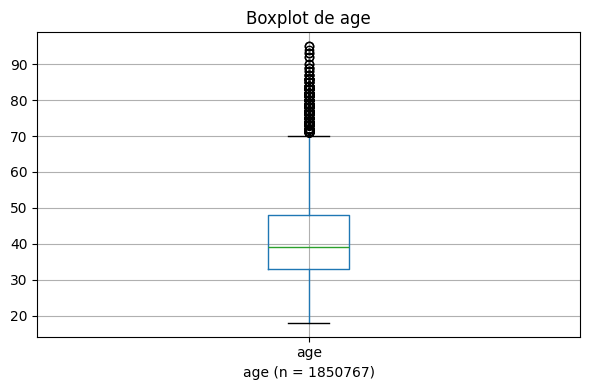

age
Porcentaje Outliers: 487 (1.08%)


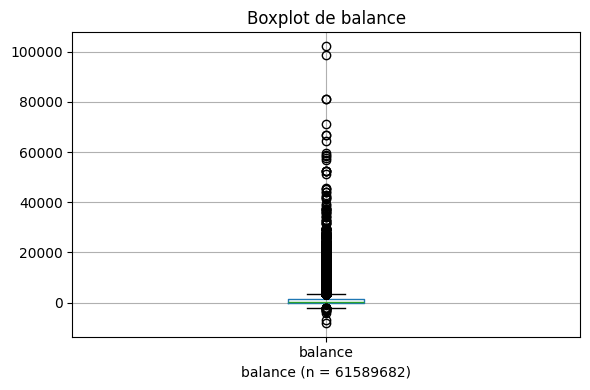

balance
Porcentaje Outliers: 4729 (10.46%)


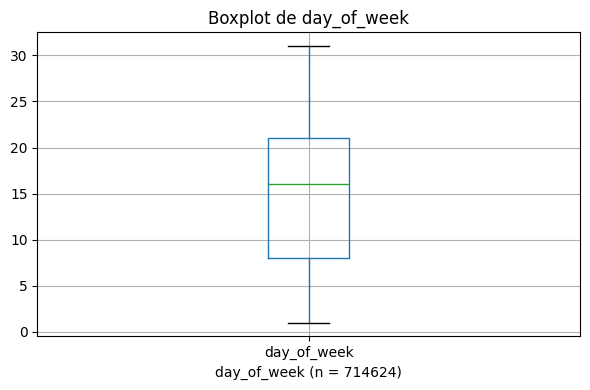

day_of_week
Porcentaje Outliers: 0 (0.00%)


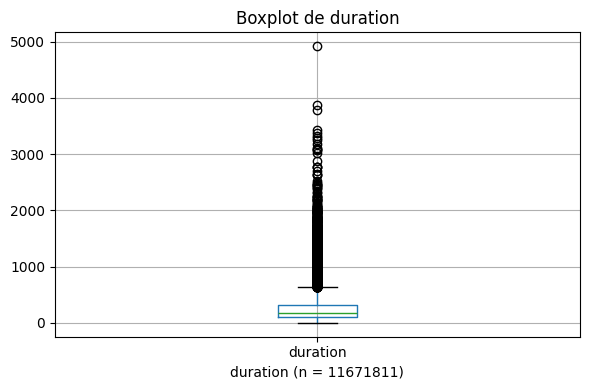

duration
Porcentaje Outliers: 3235 (7.16%)


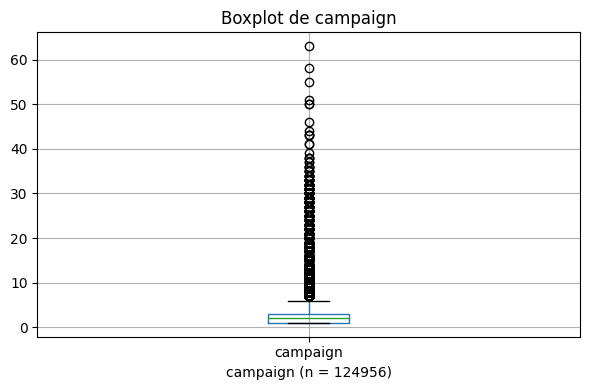

campaign
Porcentaje Outliers: 3064 (6.78%)


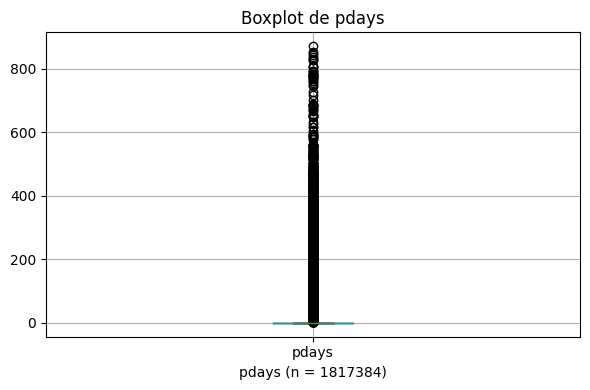

pdays
Porcentaje Outliers: 8257 (18.26%)


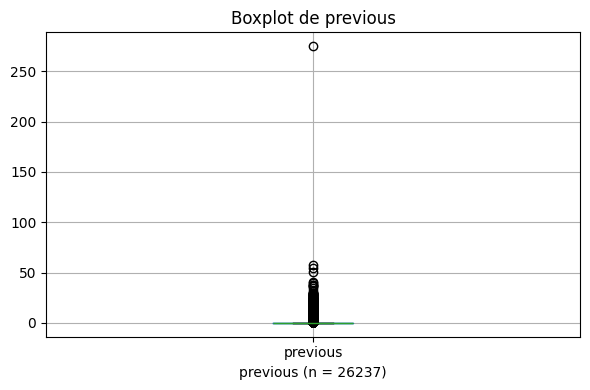

previous
Porcentaje Outliers: 8257 (18.26%)


In [98]:
df_filtrado = df.copy()

var_numericas = df.select_dtypes(include=['int64','float64']).columns.tolist()

for var in var_numericas:

    n = df[var].sum() 

    plt.figure(figsize=(6, 4))
    df.boxplot(column=[var])
    plt.title(f"Boxplot de {var}")
    plt.xlabel(f"{var} (n = {n})")  
    plt.tight_layout()
    plt.show()

    datos = df[var]
    Q1 = datos.quantile(0.25)
    Q3 = datos.quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    
    outliers = datos[(datos < lim_inf) | (datos > lim_sup)]
    total = len(datos)
    
    print(var)
    print(f"Porcentaje Outliers: {len(outliers)} ({(len(outliers)/total)*100:.2f}%)")



In [99]:
df_filtrado = df.copy()

for var in var_numericas:
    Q1 = df_filtrado[var].quantile(0.25)
    Q3 = df_filtrado[var].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    df_filtrado = df_filtrado[(df_filtrado[var] >= lim_inf) & (df_filtrado[var] <= lim_sup)]

print(f"Número de observaciones en df original: {df.shape[0]}")
print(f"Número de observaciones en df filtrado (IQR): {df_filtrado.shape[0]} ({df_filtrado.shape[0]/df.shape[0]})")


Número de observaciones en df original: 45211
Número de observaciones en df filtrado (IQR): 28069 (0.6208444847492867)


In [100]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd

df2 = df.copy()
df3 = df.copy()

X = df3.select_dtypes(include=["int64"])

# DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_dbscan = DBSCAN(eps=1.25, min_samples=5).fit(X_scaled)
df3['cluster'] = x_dbscan.labels_

outliers = df3[df3['cluster'] == -1]
df3 = df3[df3['cluster'] != -1]

df2 = df2.loc[df3.index]


print(f"Outliers: {len(outliers)}")
print(f"Porcentaje de outliers: {round(len(outliers) / len(df) * 100, 2)}%")
print(f"Observaciones restantes: {len(df3)}")



Outliers: 677
Porcentaje de outliers: 1.5%
Observaciones restantes: 44534





---


La primera metodologia que se analizó es eliminar las observaciones que esten fuera del IQR. Con esta metodología, un gran porcentaje de las observaciones son consideradas "atípicas", eliminando el 38% de las observaciones. 
Como alternativa se utilizó  DBSCAN, un algoritmo que busca detectar el ruido basado en densidades. Con esta metodología, se obtienen un 1,5% de outliers, un porcentaje común de outliers.


---

## Feature Engineering

### Pregunta 1.4

 Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.

Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.



In [101]:
df2 = df2.drop(['cluster'], axis=1, errors='ignore')

var_numericas = df2.select_dtypes(include=['int64', 'float64']).columns.to_list()
var_binarias = ["default", "housing", "loan"]
var_categoricas = []
var_multinivel = []

for col in df2.select_dtypes(include='object').columns:
    if col not in var_numericas and col not in var_binarias and col != "y":
        var_categoricas.append(col)

var_numericas.remove("day_of_week")

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
education_order = ['unknown', 'primary', 'secondary', 'tertiary']


print("Variables binarias:", var_binarias)
print("Variables numéricas:", var_numericas)
print("Variables categóricas binarias:", var_categoricas)
print("Cantidad variables: ", len(var_binarias) + len(var_categoricas) + len(var_numericas) )


Variables binarias: ['default', 'housing', 'loan']
Variables numéricas: ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
Variables categóricas binarias: ['job', 'marital', 'education', 'contact', 'month']
Cantidad variables:  14


In [102]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder, MinMaxScaler
import pandas as pd
import numpy as np

X = df3
y = df3['y'].map({'no': 0, 'yes': 1})

preprocessor = ColumnTransformer([
    ('numericas', StandardScaler(), var_numericas),
    ('categoricas', OneHotEncoder(handle_unknown='ignore', sparse_output=False), var_categoricas),
    ('binarias', OneHotEncoder(handle_unknown='ignore', sparse_output=False), var_binarias),
    ('multinivel', Pipeline([
        ('ordinal', OrdinalEncoder(categories= month_order)),
        ('minmax', MinMaxScaler())]), var_multinivel)
], remainder='drop')

def agregar_nombres(X, transformer=preprocessor):
    nombres_num = var_numericas
    nombres_cat = transformer.named_transformers_['categoricas'].get_feature_names_out(var_categoricas)
    nombres_bin = transformer.named_transformers_['binarias'].get_feature_names_out(var_binarias)
    nombres_ord = var_multinivel
    columnas_finales = list(nombres_num) + list(nombres_cat) + list(nombres_bin) + list(nombres_ord)
    return pd.DataFrame(X, columns=columnas_finales)


In [103]:
Pipeline([("preprocessor", preprocessor),
    ("nombres", FunctionTransformer(agregar_nombres, validate=False))])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numericas', StandardScaler(),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('categoricas',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month']),
                                                 ('binarias',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['default', 'housing',
                                                   'loan']),
                                                 ('multinivel',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=['jan',
                                                                                              'feb',
                                                                                              'mar',
                                                                                              'apr',
                                                                                              'may',
                                                                                              'jun',
                                                                                              'jul',
                                                                                              'aug',
                                                                                              'sep',
                                                                                              'oct',
                                                                                              'nov',
                                                                                              'dec'])),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  [])])),
                ('nombres',
                 FunctionTransformer(func=<function agregar_nombres at 0x14cdd4310>))])

In [104]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("nombres", FunctionTransformer(agregar_nombres, validate=False))
])

X_pipeline = pipeline.fit_transform(X)




In [105]:
print("Forma original:", X.shape)
print("Forma transformada:", X_pipeline.shape)
print(X_pipeline.head())


Forma original: (44534, 17)
Forma transformada: (44534, 46)
        age   balance  duration  campaign     pdays  previous  job_admin.  \
0  1.630508  0.379412  0.031895  -0.58732 -0.404001 -0.340009         0.0   
1  0.299003 -0.510575 -0.419522  -0.58732 -0.404001 -0.340009         0.0   
2 -0.747179 -0.521942 -0.727306  -0.58732 -0.404001 -0.340009         0.0   
3  0.584326  0.111237 -0.661645  -0.58732 -0.404001 -0.340009         0.0   
4 -0.747179 -0.522363 -0.226644  -0.58732 -0.404001 -0.340009         0.0   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_may  \
0              0.0               0.0            0.0  ...        1.0   
1              0.0               0.0            0.0  ...        1.0   
2              0.0               1.0            0.0  ...        1.0   
3              1.0               0.0            0.0  ...        1.0   
4              0.0               0.0            0.0  ...        1.0   

   month_nov  month_oct  month_sep  default_no  de

## Modelos

En esta sección aplicaremos los algoritmos de clasificación vistos en el curso. Específicamente, compararemos el rendimiento de los siguientes modelos:

*   _Decision Tree Classifier_
*   _Random Forest Classifier_
*   _XGBoost Classifier_
*   _Naïve Bayes_



### Pregunta 1.5

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba. Analice la distribución de la variable objetivo en ambos conjuntos para determinar si el conjunto de datos está balanceado o no.

En caso de que el conjunto de datos no esté balanceado, asegúrese de que la división de _train_-_test_ respete el balance de las clases target para evitar que se genere un sesgo. Para esto, se recomienda leer la documentación oficial de la función `train_test_split()`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Use la semilla `random_state` = 123.


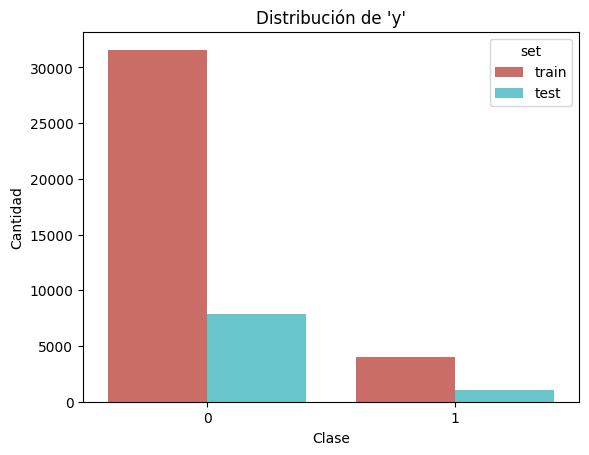

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

X = X_pipeline



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)



y_combined = pd.concat([
    pd.DataFrame({'y': y_train, 'set': 'train'}),
    pd.DataFrame({'y': y_test, 'set': 'test'})
])

sns.countplot(x='y', hue='set', data=y_combined, palette='hls')
plt.title("Distribución de 'y'")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()





Las clases estan claramente desbalanceadas, donde hay mychos mas "no (0)" que "si (1)" pero que este desbalance se mantiene proporcional entre los conjuntos de entrenamiento y de prueba. Esto es porqye se utilizó "_stratify_"

### Pregunta 1.6

Entrene un árbol clasificador sin definir profundad máxima del árbol. Llamaremos a este, "modelo no regularizado".

Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `DecisionTreeClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento. Luego, grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [107]:
from sklearn.tree import DecisionTreeClassifier

m1 = DecisionTreeClassifier()  
mnr = m1.fit(X_train, y_train)  


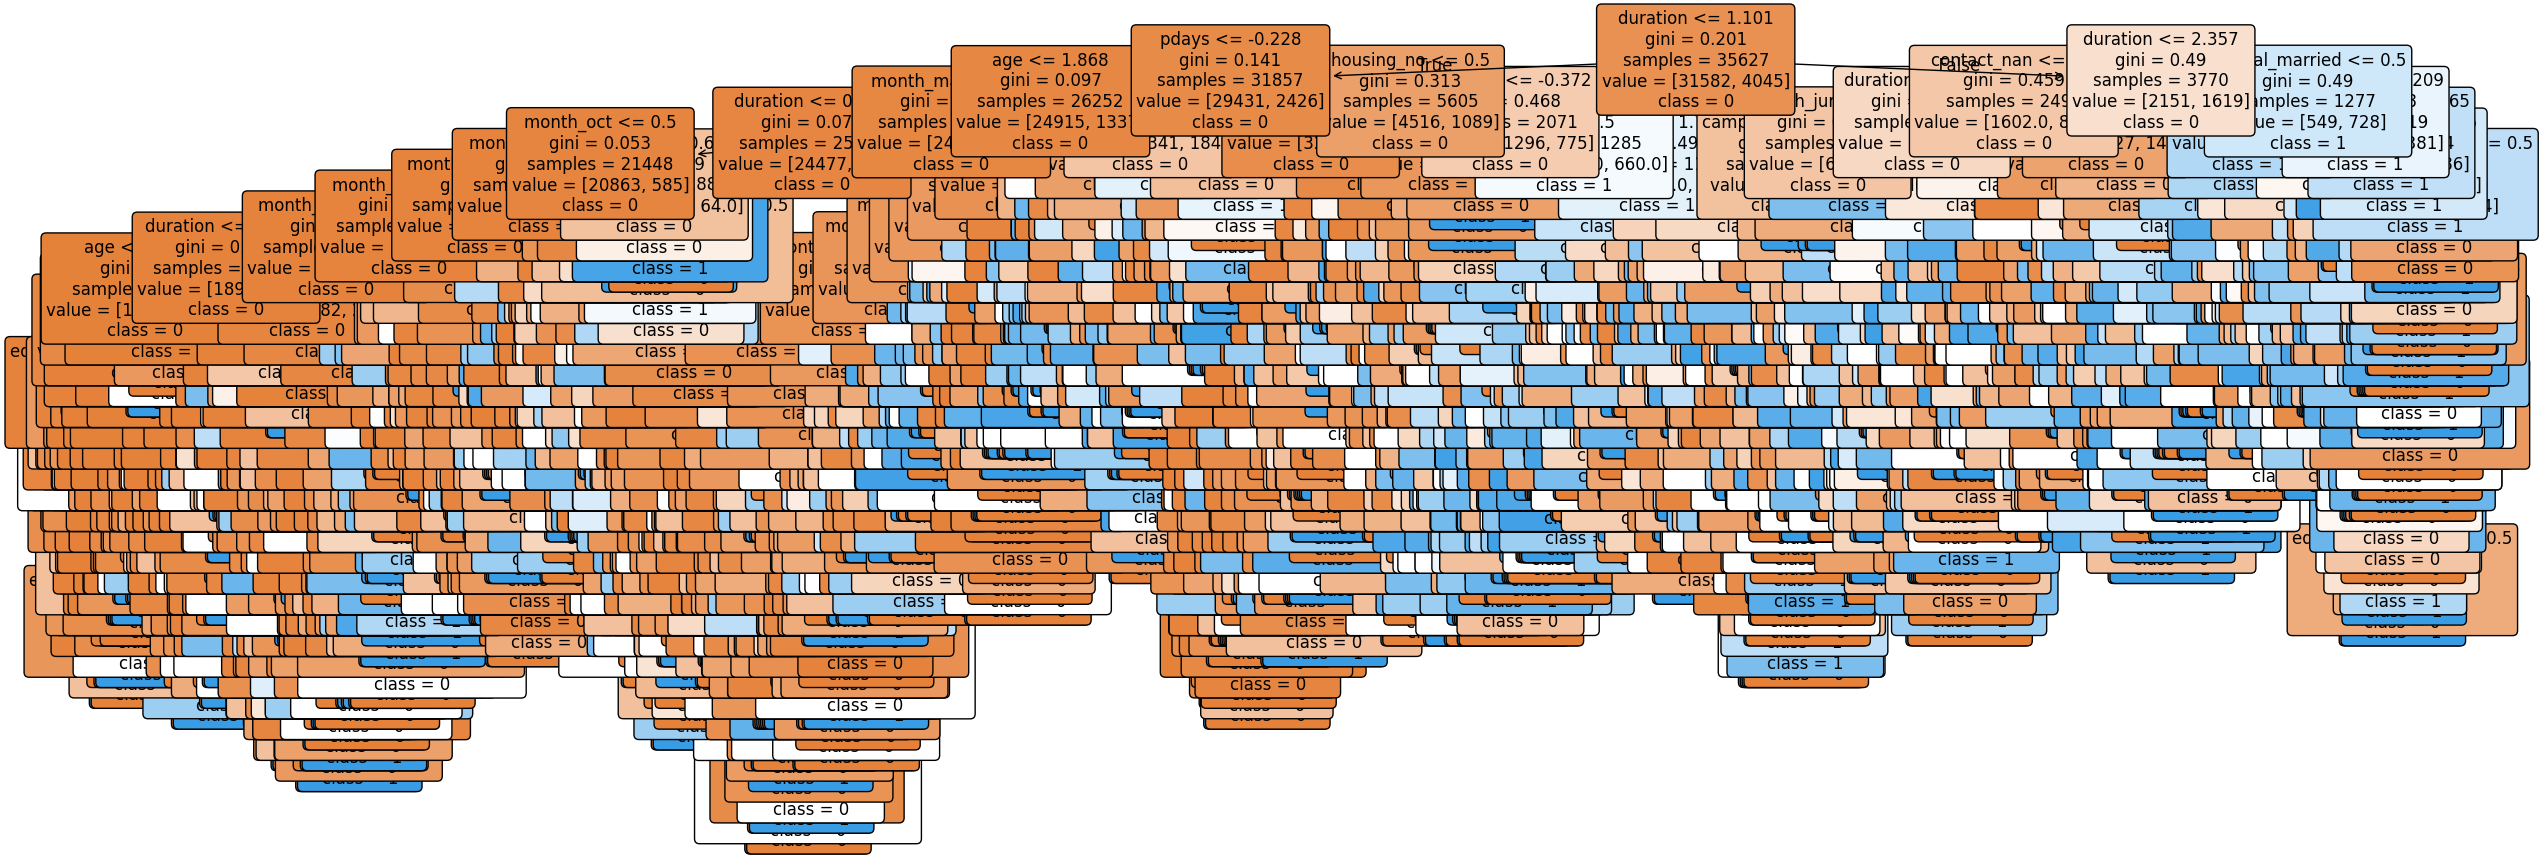

In [108]:
from sklearn import tree
import matplotlib.pyplot as plt

feature_names = X_train.columns.tolist()  
class_names = ['0', '1']  

plt.figure(figsize=(30, 10))
tree.plot_tree(
    mnr,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    fontsize=12,
    rounded=True
)
plt.show()


In [109]:
from sklearn.metrics import f1_score

y_train_mnr = m1.predict(X_train)
f1_mnr = f1_score(y_train, y_train_mnr)
print(f'F1 Score modelo no regularizado (train): {f1_mnr}')




F1 Score modelo no regularizado (train): 1.0





---


El modelo no regularizado parece incurrir en overfitting, ya que es muy complejo y tiene un F1 score de 1. Es decir, no hay falsos negativos ni falsos positivos. Este score tan alto puede significar que el modelo esta internalizando el ruido, por lo que cuando se use en el set de prueba, la métrica de desempeño disminuira considerablemente.


---


### Pegunta 1.7

En el contexto particular de una campaña de marketing, donde probablemente la mayoría de clientes no harán depósitos, es importante identificar correctamente tanto los clientes que harán depósitos (clase minoritaria), como los clientes que no harán depósitos.

En el primer caso, falsos negativos implican un cliente peridido. En el segundo caso, falsos positivos implicarían un gasto de marketing innecesario en clientes que no son de interés. En este sentido, si clasificamos a todos los clientes como individuos que no harán depósitos, el _accuracy_ será muy alto, pero el costo económico será muy grande.

Para penalizar tanto falsos positivos, como falsos negativos, a la vez que se busca maximizar los verdaderos positivos, nos enfocaremos en la métrica de _performance_ $F_1\ Score$.

Calcule el $F_1\ Score$ de su árbol no regularizado con la muestra correcta. ¿Considera que es un buen valor? Comente.

In [110]:

y_test_mnr = m1.predict(X_test)
f1_test_mnr = f1_score(y_test, y_test_mnr)
print(f'F1 Score modelo no regularizado (test): {f1_test_mnr}')


F1 Score modelo no regularizado (test): 0.43373493975903615





---

No me parece un buen valor, ya que es muy bajo. Esto reafirma la idea anterior, de que este modelo tiene una capacidad muy alta, que hace que internalice el ruído.

---


### Pregunta 1.8

Entrene un árbol clasificador con profundad máxima del árbol igual a 16. Llamaremos a este, "modelo levemente regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [111]:
m2 = DecisionTreeClassifier(max_depth=16, class_weight='balanced', random_state=123)
mlr = m2.fit(X_train, y_train)


In [112]:
y_train_mlr = mlr.predict(X_train)
f1_mlr = f1_score(y_train, y_train_mlr)
print(f'F1 Score (train): {f1_mlr}')


F1 Score (train): 0.7143118929814917


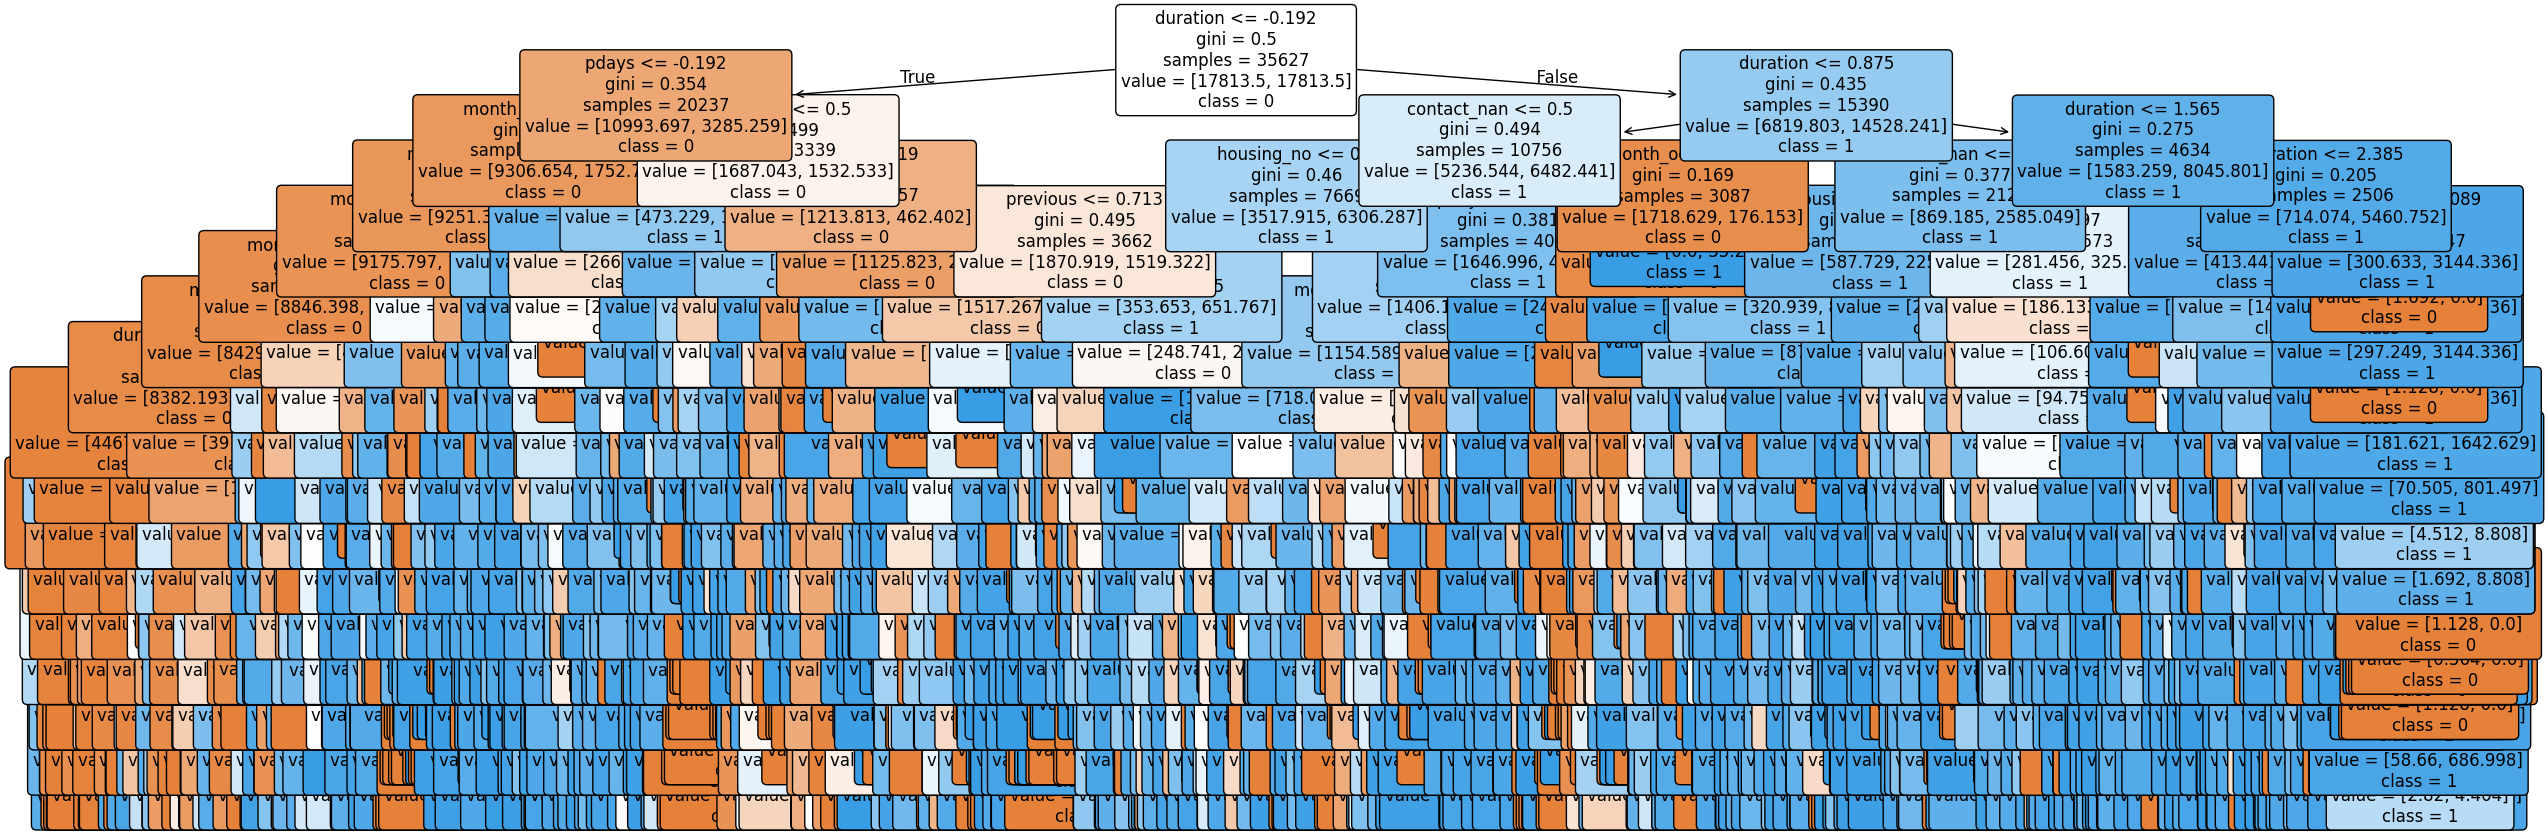

In [113]:
plt.figure(figsize=(30, 10))
tree.plot_tree(
    mlr,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    fontsize=12,
    rounded=True
)
plt.show()





---

Se observa que el F1 score es relativamente alto, pero se sobre el valor de entrenamiento y lo importante es evaluar su desempeño sobre el set de prueba. El árbol sigue siendro profundo, por lo que todavia se podria estar incurriendo en overfitting y tiene baja explicabilidad.


---


### Pregunta 1.9

Entrene un árbol clasificador con profundad máxima del árbol igual a 8. Llamaremos a este, "modelo regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?


In [132]:
m3 = DecisionTreeClassifier(max_depth=8, class_weight='balanced', random_state=123)
mr = m3.fit(X_train, y_train)

In [133]:
y_train_mr = mr.predict(X_train)
f1_mr = f1_score(y_train, y_train_mr)
print(f'F1 Score (train): {f1_mr}')


F1 Score (train): 0.5345573966263621


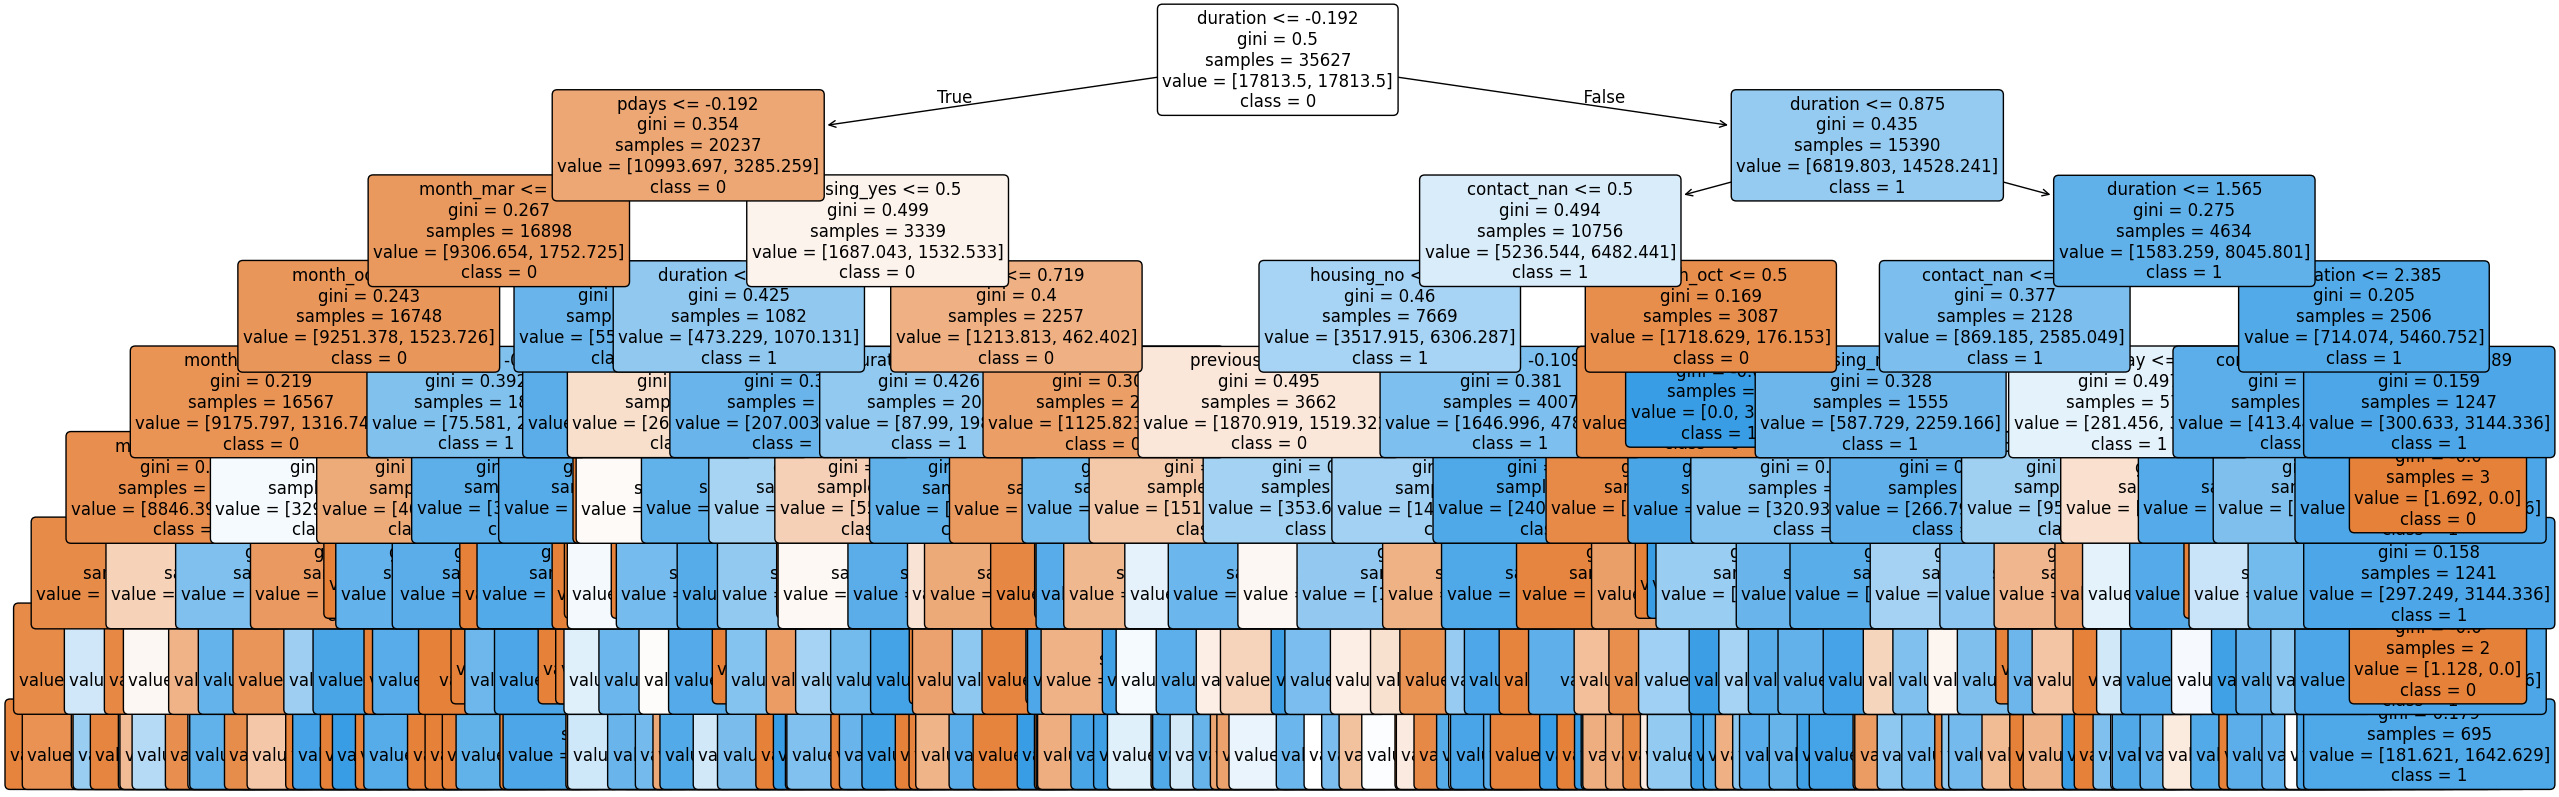

In [134]:
plt.figure(figsize=(30, 10))
tree.plot_tree(
    mr,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    fontsize=12,
    rounded=True
)
plt.show()





---


El modelo regularizado tiene una menor complejidad, lo que hace que disminuya la probabilidad de overfitting. Tambien mejora su interpretabilidad. El F1 score es menor, lo que tiene sentido ya que el modelo es mas generalizable e internaliza menos ruído. Es importante recordar que se debe probar su desempeño en el test de prueba, no de entrenamiento para comprobar su desempeño.

---


### Pregunta 1.10

Entrene 20 árboles de clasificación. Cada uno de ellos debe estar entrenado fijando la profundidad máxima del árbol `max_depth` igual a $n \in [1,20]$. Obtenga el $F_1\ Score$ de cada árbol con la base de entrenamiento y la base de prueba.

Gafique en una misma figura $F_1\ Score$ de entrenamiento contra $n$ y $F_1\ Score$ de prueba contra $n$ (Eje X = $n$). ¿Cuál parece ser el parámetro óptimo $n^*$ para el árbol? ¿Qué puede decir sobre el parámetro sobre _overfitting_ y generalización?

In [117]:
f1_score_train = []
f1_score_test = []

for i in range(0,20):
    arbol = DecisionTreeClassifier(max_depth= (i+1), class_weight='balanced', random_state=123)
    modelo = arbol.fit(X_train, y_train)

    y_entrenamiento = modelo.predict(X_train)
    f1_score_entrenamiento = f1_score(y_train, y_entrenamiento)
    f1_score_train.append(f1_score_entrenamiento)

    y_testeo = modelo.predict(X_test)
    f1_score_testeo = f1_score(y_test, y_testeo)
    f1_score_test.append(f1_score_testeo)


print(f"f1 score (training set): {f1_score_train}")
print(f"f1 score (test set): {f1_score_test}")

f1 score (training set): [0.33949060972472345, 0.33949060972472345, 0.40432309442548353, 0.4744186046511628, 0.47150153217568946, 0.4898895142797582, 0.5199611969256026, 0.5345573966263621, 0.5425555473536576, 0.5799603960396039, 0.6032414910858995, 0.6212695795548228, 0.6570039923624371, 0.6698622973679623, 0.698415572657311, 0.7143118929814917, 0.749640701350963, 0.7778438367023385, 0.7951444622792937, 0.8128179043743642]
f1 score (test set): [0.3404951913239206, 0.3404951913239206, 0.4117647058823529, 0.4739476008242567, 0.4658590308370044, 0.4761637689287717, 0.5010538994278831, 0.5089475280558083, 0.5002977963073257, 0.5242091672046482, 0.5230769230769231, 0.5221740580193398, 0.5202108963093146, 0.5126582278481012, 0.5082026977761575, 0.5094689936873376, 0.5094488188976378, 0.5072697899838449, 0.5030475416497359, 0.49033319621554916]


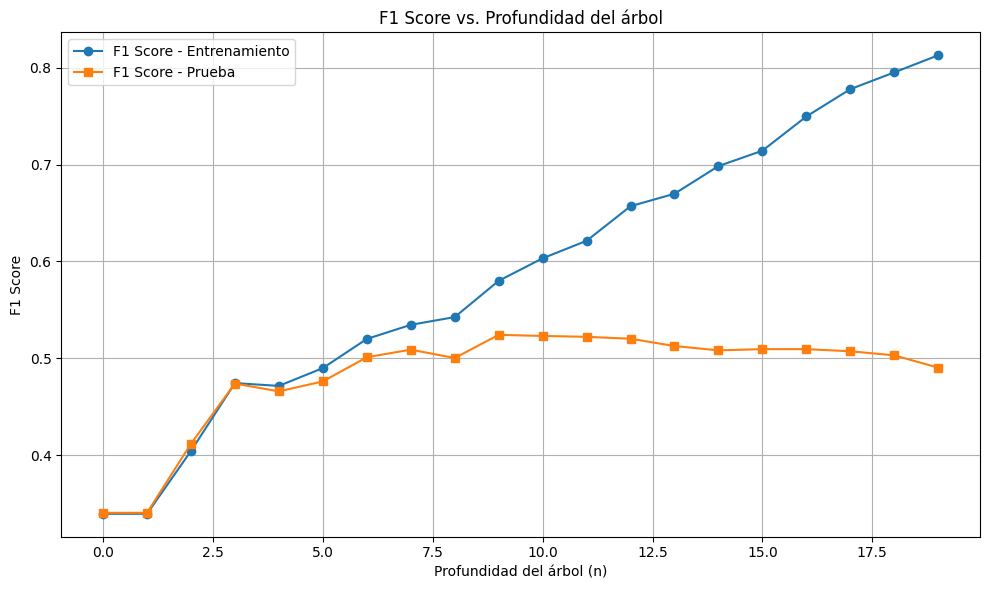

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(f1_score_train, marker='o', label='F1 Score - Entrenamiento')
plt.plot(f1_score_test, marker='s', label='F1 Score - Prueba')
plt.title('F1 Score vs. Profundidad del árbol')
plt.xlabel('Profundidad del árbol (n)')
plt.ylabel('F1 Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




---


Se observa que el F1 score para ek test de prueba alcanza su punto maximo en n = 9. En los valores mas valores mas bajos (n<3) el modelo incurre en undrefitting, es decir que el modelo no captura la esencia del patrón subyacente, y en los valores altos (>9) incurre en overfitting.


---


### Pregunta 1.11

En esta pregunta deberá entrenar _Random forest Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Realice _Cross Validation_ con un _folding_ con `K=5` y calcule $F_1\ Score$ de todas las posibles combinaciones de los siguientes parámetros:

- `n_estimators = {100, 1000}`
- `max_depth = {10, 50, 100}`
- `min_samples_leaf = {2, 4}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta. Finalmente, reporte el $F_1\ Score$ con la muestra de prueba.

Cuando realice _Cross Validation_ y cuando entrene el modelo final, asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `RandomForestClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = [{"n_estimators":[100,1000] ,'max_depth': [10, 50, 100], 'min_samples_leaf': [2, 4,]},] 
rf = RandomForestClassifier(random_state = 12, criterion='entropy',class_weight='balanced')

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring = 'f1', return_train_score=True)
grid_search.fit(X_train, y_train) 
grid_search.best_params_

{'max_depth': 50, 'min_samples_leaf': 4, 'n_estimators': 100}

Grid search testea los distintos hiperparametros usando k-fold validation. El resultado nos da que los mejores hiperparametros son:
- profundidad maxima de cada arbol: 50
- mínimo de observaciones por hoja: 4
- número de árboles: 1000

In [121]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state = 12, n_estimators=1000, max_depth= 50, min_samples_leaf= 4, criterion='entropy',class_weight='balanced')
rf.fit(X_train, y_train) 

cv_rf = cross_val_score(modelo, X_train, y_train, cv=5, scoring='f1')
print(cv_rf)

f1_rf = sum(cv_rf)/len(cv_rf)
print(f1_rf) 

[0.49435787 0.47783784 0.48680668 0.4958159  0.50719233]
0.49240212303023856


### Pregunta 1.12

En esta pregunta deberá entrenar _XGBoost Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Repita el ejercicio de _Cross Validation_ anterior, pero está vez evaluando:

- `n_estimators = {100, 1000}`
- `max_depth = {5, 50, 100}`
- `learning_rate = {0.05, 0.1, 0.5}`
- `max_leaves= {2, 4, 10}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta, reportando el $F_1\ Score$ con la muestra de prueba.

Asegúrese de que sus modelos sean capaces de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `XGBClassifier()` (parámetros de inicialización): https://xgboost.readthedocs.io/en/latest/python/python_api.html.


In [123]:
from xgboost import XGBClassifier

param_grid = [{"n_estimators":[100, 1000] ,'max_depth': [5, 50, 100], 'learning_rate': [0.05, 0.1, 0.5], 'max_leaves':[2, 4, 10,]}] #combinación de parámetros
xgb = XGBClassifier(random_state = 123)

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring = 'f1', return_train_score=True)
grid_search.fit(X_train, y_train) #entrenamos el grid search
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'max_leaves': 10, 'n_estimators': 1000}

In [126]:
xgb = XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.1, max_leaves=10, random_state=123)
xgb.fit(X_train, y_train)


y_test_xgb = xgb.predict(X_test)

# Evaluar F1 Score
f1_xgb = f1_score(y_test, y_test_xgb)
print(f"F1 Score en test para XGBoost: {f1_xgb}")

F1 Score en test para XGBoost: 0.5288018433179723


### Pregunta 1.13

Entrene un modelo _Naïve Bayes_. Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `GaussianNB()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.class_weight import compute_sample_weight

weights = compute_sample_weight(class_weight='balanced', y=y_train)

nb = GaussianNB()
nb.fit(X_train, y_train, sample_weight=weights)


GaussianNB()

In [ ]:
y_train_nb = nb.predict(X_train)
f1_nb = f1_score(y_train, y_train_nb)

print(f"F1 Score en entrenamiento nb: {f1_nb}")


F1 Score en entrenamiento nb: 0.4183433025194852




---



## Análisis Comparativo de Modelos de Clasificación


### Pregunta 1.14

Evalúe y compare el desempeño de los modelos teniendo en cuenta la naturaleza del conjunto de datos. ¿Cómo afectó el desbalance a cada modelo? ¿Qué modelo manejó mejor el balance o desbalance de clases y cuáles son sus conclusiones generales sobre su rendimiento comparado?

Para que la comparación sea clara, es útil indicar qué métricas de evaluación utilizo para comparar los modelos (por ejemplo, F1-score, precisión, recall, AUC, etc.).

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
import pandas as pd

modelos = {
    'Árbol no regularizado': mnr,
    'Árbol leve regularizado': mlr,
    'Árbol regularizado': mr,
    'Random Forest': rf,
    'XGBoost': xgb,
    'Naïve Bayes': nb
}

resultados = {}

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    resultados[nombre] = {
        'F1 Score': f1_score(y_test, y_pred),
        'Precisión': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    }

df_resultados = pd.DataFrame(resultados).T.round(4)
display(df_resultados)





,F1 Score,Precisión,Recall
Árbol no regularizado,0.4337,0.4229,0.4451
Árbol leve regularizado,0.5095,0.4078,0.6785
Árbol regularizado,0.5089,0.3670,0.8299
Random Forest,0.6116,0.4957,0.7982
XGBoost,0.5288,0.6331,0.4540
Naïve Bayes,0.4268,0.3364,0.5836





---

Análisis de modelos:
- Árbol no regularizado: tiene un bajo desempeño en todas las métricas
- Árbol levemente regularizado: tiene un recall más alto, es decir que no deja pasar casos positivos, per las otras métricas son bajas (sacrifica precisión)
- Árbol regularizado: tiene un recall muy alto, pero sacrifica mucha precisión
- Random Forest: Tiene un F1 score relativamente alto y un recall alto, sin sacrificar tanta precisión como los modelos anteriores.
- XGBoost: Mejor precisión pero menor recall. Menor F1 score que RF
- Naïve Bayes: Desempeño bajo en muchas de las métricas

El modelo que mejor maneja el desbalace de clases y que entrega mejores resultados es _*Random forest*_. Esto es porque presenta el mejor desempeño en F1 score y, como se mencionó previamente, es igual de importante identificar correctamente tanto los clientes que harán depósitos, como los clientes que no harán depósitos.


---


# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




In [144]:
import pandas as pd

# 1. Cargar el archivo local
df = pd.read_csv("/Users/macarenaramirez/Desktop/Macarena-Ramirez-EAE3709-/Data.csv")

# 2. Eliminar columnas innecesarias
df = df.drop(columns=["Series Code", "Country Code"])

# 3. Renombrar la columna de valores de 2023 para facilitar su uso
df = df.rename(columns={"2023 [YR2023]": "Value"})

# 4. Filtrar solo las series relevantes
series_relevantes = [
    "GDP growth (annual %)",
    "Agricultural raw materials exports (% of merchandise exports)",
    "Computer, communications and other services (% of commercial service exports)",
    "Exports of goods and services (% of GDP)",
    "Food exports (% of merchandise exports)",
    "Fuel exports (% of merchandise exports)",
    "High-technology exports (% of manufactured exports)",
    "ICT service exports (% of service exports, BoP)",
    "Insurance and financial services (% of service exports, BoP)",
    "International tourism, receipts (% of total exports)",
    "Manufactures exports (% of merchandise exports)",
    "Merchandise exports to high-income economies (% of total merchandise exports)",
    "Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)",
    "Ores and metals exports (% of merchandise exports)",
    "Taxes on exports (% of tax revenue)",
    "Transport services (% of commercial service exports)"
]
df = df[df["Series Name"].isin(series_relevantes)]

# 5. Transformar a formato Wide
df_wide = df.pivot_table(
    index="Country Name",
    columns="Series Name",
    values="Value",
    aggfunc="first"
).reset_index()

# 6. Mostrar resumen
print("DataFrame final (formato Wide):")
print(df_wide.head())


DataFrame final (formato Wide):
Series Name                 Country Name  \
0                            Afghanistan   
1            Africa Eastern and Southern   
2             Africa Western and Central   
3                                Albania   
4                                Algeria   

Series Name Agricultural raw materials exports (% of merchandise exports)  \
0                                                           ..              
1                                                  1.932875262              
2                                                  3.804826878              
3                                                  0.406032063              
4                                                           ..              

Series Name Exports of goods and services (% of GDP)  \
0                                        16.77513628   
1                                        24.34833725   
2                                                 ..   
3               

### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




In [ ]:
# 1. Cargar la base de datos ya transformada desde el inciso 2.0
df_wide = pd.read_csv("df_wide_2_0.csv")

# 2. Lista de regiones a eliminar, ya que no son países individuales
to_remove = [
    "Africa Eastern and Southern", "Africa Western and Central", "Arab World", 
    "Caribbean small states", "Central Europe and the Baltics", "Early-demographic dividend", 
    "East Asia & Pacific", "East Asia & Pacific (IDA & IBRD countries)", 
    "East Asia & Pacific (excluding high income)", "Euro area", "Europe & Central Asia", 
    "Europe & Central Asia (IDA & IBRD countries)", "Europe & Central Asia (excluding high income)", 
    "European Union", "Fragile and conflict affected situations", 
    "Heavily indebted poor countries (HIPC)", "High income", "IBRD only", "IDA & IBRD total", 
    "IDA blend", "IDA only", "IDA total", "Late-demographic dividend", 
    "Latin America & Caribbean", "Latin America & Caribbean (excluding high income)", 
    "Latin America & the Caribbean (IDA & IBRD countries)", 
    "Least developed countries: UN classification", "Low & middle income", "Low income", 
    "Lower middle income", "Middle East & North Africa", 
    "Middle East & North Africa (IDA & IBRD countries)", 
    "Middle East & North Africa (excluding high income)", "Middle income", "North America", 
    "Not classified", "OECD members", "Other small states", "Pacific island small states", 
    "Post-demographic dividend", "Pre-demographic dividend", "Small states", "South Asia", 
    "South Asia (IDA & IBRD)", "Sub-Saharan Africa", 
    "Sub-Saharan Africa (IDA & IBRD countries)", 
    "Sub-Saharan Africa (excluding high income)", "Upper middle income", "World"
]

# 3. Filtrar las filas: mantener solo países reales
df_filtered = df_wide[~df_wide['Country Name'].isin(to_remove)].reset_index(drop=True)

# 4. Mostrar resumen
print("Países restantes tras la limpieza:", len(df_filtered))
print(df_filtered.head())

FileNotFoundError: [Errno 2] No such file or directory: 'df_wide_2_0.csv'

### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


In [ ]:
# 1. Cargar la base de datos limpia desde la pregunta 2.1
df_filtered = pd.read_csv("df_filtered_2_1.csv")

# 2. Reemplazar los valores ".." por NaN (valores faltantes)
df_filtered.replace("..", pd.NA, inplace=True)

# 3. Convertir todas las columnas numéricas a tipo float (excepto el nombre del país)
for col in df_filtered.columns[1:]:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors="coerce")

# 4. Desplegar estadísticas descriptivas de las columnas numéricas
print("Estadísticas descriptivas:")
print(df_filtered.describe())

### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.

In [ ]:
import matplotlib.pyplot as plt

# 1. Cargar la base de datos limpia desde la pregunta 2.2
df = pd.read_csv("df_cleaned_2_2.csv")

# 2. Identificar columnas numéricas (se excluye el nombre del país)
numeric_cols = df.columns[1:]

# 3. Configurar el estilo visual
plt.style.use('ggplot')

# 4. Graficar histogramas para cada variable numérica
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    df[col].hist(bins=30, edgecolor='black')
    plt.title(f"Distribución de: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()




---


*Escriba* su respuesta en esta celda...


---


## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


In [ ]:
import numpy as np

# Cargar el dataset limpio de la pregunta 2.3
df = pd.read_csv("df_cleaned_2_2.csv")

# 1. Volvemos a revisar la cantidad de valores nulos por columna
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_percent = (missing_counts / len(df)) * 100

# Comentario 1:
# Queremos mantener la mayor cantidad de observaciones (países), por eso
# NO eliminaremos filas. Imputar valores faltantes es una mejor opción.

# 2. Imputación de valores faltantes
# Comentario 2:
# Usamos la mediana porque es robusta a outliers. Evita distorsionar los datos,
# lo cual es clave para técnicas como PCA y KMeans.

df_imputed = df.copy()
for col in df.columns[1:]:  # Saltamos 'Country Name'
    if df[col].isna().sum() > 0:
        mediana = df[col].median()
        df_imputed[col] = df[col].fillna(mediana)

# 3. Verificación final de nulos
nulos_post = df_imputed.isna().sum().sum()

# Mostrar resumen en consola
print("Se imputaron los valores faltantes con la mediana de cada columna.")
print(f"Cantidad total de valores nulos luego del tratamiento: {nulos_post}")
print("DataFrame listo para clustering sin valores faltantes.")

## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el dataset sin nulos e imputado (de la 2.4)
df = pd.read_csv("df_ready_2_4.csv")

# 2. Seleccionar solo las columnas numéricas (excluyendo el nombre del país)
X = df.drop(columns=["Country Name"])

# 3. Generar boxplots para identificar visualmente posibles outliers por variable
plt.figure(figsize=(18, 20))
for i, col in enumerate(X.columns):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(data=X, y=col, color="orange")
    plt.title(col, fontsize=8)
    plt.tight_layout()

# 4. Guardar imagen para revisión
plt.savefig("boxplots_outliers_2_5.png")
plt.show()




---


Se realizó un análisis visual de outliers mediante boxplots para cada variable numérica del dataset.
Si bien se detectaron múltiples valores extremos (outliers), especialmente en variables como:
'Fuel exports', 'GDP growth', 'Ores and metals exports', y 'Taxes on exports',
estos valores reflejan comportamientos económicos reales y diferenciadores entre países.

En lugar de tratarse de errores o ruido, representan características estructurales de las economías:
países exportadores de petróleo, crisis económicas, o políticas fiscales atípicas.

Por este motivo, no se aplicó procesamiento adicional de outliers, ya que eliminarlos o truncarlos
podría distorsionar la segmentación real que se busca analizar mediante clustering.

Conclusión: Se conserva la información original para preservar la validez del análisis económico posterior.


---


## Feature Engineering


### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Cargar el dataset listo y limpio desde la etapa 2.4
df = pd.read_csv("df_ready_2_4.csv")

# 2. Separar los nombres de países del resto de las variables numéricas
country_names = df["Country Name"]
X = df.drop(columns=["Country Name"])

# 3. Estandarizar las variables numéricas (Feature Engineering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Entrenar modelo KMeans con K=5 (según análisis previo)
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 5. Agregar etiquetas de cluster al dataframe original
df_clusters = df.copy()
df_clusters["Cluster"] = clusters

# 6. Guardar el nuevo dataframe con cluster asignado
df_clusters.to_csv("df_clusters_2_6.csv", index=False)

En esta etapa se realizó una estandarización de las variables numéricas utilizando StandardScaler,
lo que permite que todas las variables contribuyan de forma equitativa al cálculo de distancias en el modelo KMeans.
Se utilizó el valor óptimo de K=5 identificado previamente, y se agregaron las etiquetas de cluster
al conjunto de datos limpio. Esta preparación es fundamental para interpretar los perfiles exportadores
y avanzar en la visualización de grupos similares en etapas posteriores.

## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el dataset con estandarización y clusters ya asignados
df = pd.read_csv("df_clusters_2_6.csv")

# 2. Separar el nombre del país y el cluster del resto de las variables
cluster_labels = df["Cluster"]
country_names = df["Country Name"]
X_clustered = df.drop(columns=["Country Name"])

# 3. Visualizar la cantidad de países por clúster
plt.figure(figsize=(8, 5))
sns.countplot(x="Cluster", data=X_clustered)
plt.title("Cantidad de países por clúster")
plt.xlabel("Cluster")
plt.ylabel("Número de países")
plt.tight_layout()
plt.savefig("cantidad_paises_por_cluster_2_7.png")
plt.show()

# 4. Calcular la media de cada variable por clúster
df_summary = X_clustered.groupby("Cluster").mean().reset_index()

# 5. Graficar el perfil promedio de cada cluster
plt.figure(figsize=(14, 6))
for i in range(df_summary.shape[0]):
    plt.plot(df_summary.columns[1:], df_summary.iloc[i, 1:], label=f"Cluster {df_summary.iloc[i, 0]}")

plt.title("Perfil promedio de exportaciones por clúster")
plt.xlabel("Variable")
plt.ylabel("Valor promedio (estandarizado)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.savefig("perfil_promedio_clusters_2_7.png")
plt.show()

# 6. Guardar la tabla resumen por cluster
df_summary.to_csv("perfil_promedio_clusters_2_7.csv", index=False)





---


En esta etapa se analizó el perfil exportador promedio de cada clúster. Primero se confirmó que
los países están equilibradamente distribuidos entre los 5 grupos. Luego, se calculó la media
estandarizada de cada variable dentro de cada clúster y se graficaron los perfiles.
#
Esta visualización permite detectar patrones distintivos en los grupos, como mayor proporción
de exportaciones tecnológicas o dependencia de materias primas. Este análisis es esencial para
interpretar los resultados de K-Means y conectar los clústeres con la pregunta original: 
¿Qué países podrían verse afectados de manera similar por una guerra comercial?


---


### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


In [ ]:
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Cargar dataset limpio sin nulos
df = pd.read_csv("df_ready_2_4.csv")

# 2. Definir combinaciones relevantes al fenómeno de guerra comercial
combinaciones = {
    "Comb_1": ['Fuel exports (% of merchandise exports)', 'Food exports (% of merchandise exports)'],
    "Comb_2": ['GDP growth (annual %)', 'High-technology exports (% of manufactured exports)', 'Exports of goods and services (% of GDP)'],
    "Comb_3": ['Manufactures exports (% of merchandise exports)', 'Merchandise exports to high-income economies (% of total merchandise exports)', 'Transport services (% of commercial service exports)'],
    "Comb_4": ['Ores and metals exports (% of merchandise exports)', 'Taxes on exports (% of tax revenue)', 'Agricultural raw materials exports (% of merchandise exports)'],
    "Comb_5": ['Exports of goods and services (% of GDP)', 'Fuel exports (% of merchandise exports)', 'GDP growth (annual %)']
}

# 3. Crear carpeta de salida para guardar los gráficos
output_dir = "elbow_2_8"
os.makedirs(output_dir, exist_ok=True)

# 4. Ejecutar método del codo para cada combinación
for nombre, columnas in combinaciones.items():
    subset = df[columnas]
    scaler = StandardScaler()
    subset_scaled = scaler.fit_transform(subset)

    inertia = []
    for k in range(1, 31):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(subset_scaled)
        inertia.append(kmeans.inertia_)

    # Graficar
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, 31), inertia, marker='o', color='orange')
    plt.title(f"Método del Codo – {nombre}")
    plt.xlabel("Número de clusters (K)")
    plt.ylabel("Inercia")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{nombre}.png")
    plt.close()


---


Para enfrentar la pérdida de desempeño en K-Means con alta dimensionalidad, se definieron 5 combinaciones
de 2 a 4 variables estrechamente ligadas al comercio exterior. Estas fueron seleccionadas con base en su 
potencial explicativo ante un escenario de guerra comercial (como fuel, manufacturas, turismo y crecimiento).

Se aplicó el método del codo (elbow method) evaluando K entre 1 y 30. Se observó que:
 - Comb_1 y Comb_4 presentan quiebres claros en K=3
 - Comb_2, Comb_3 y Comb_5 estabilizan su inercia en torno a K=4–5

Esto permite preseleccionar combinaciones con alta capacidad de diferenciación para el modelamiento posterior.
La elección final dependerá de la interpretación estratégica que se busque en la agrupación de países.


---

### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar dataset limpio
df = pd.read_csv("df_ready_2_4.csv")

# 2. Seleccionar combinación 2 (variables clave para análisis geoeconómico)
columnas_usadas = [
    'GDP growth (annual %)',
    'High-technology exports (% of manufactured exports)',
    'Exports of goods and services (% of GDP)'
]
df_subset = df[["Country Name"] + columnas_usadas]

# 3. Estandarizar variables seleccionadas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_subset[columnas_usadas])

# 4. Aplicar modelo KMeans con K=4
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 5. Agregar etiquetas de cluster al dataframe
df_subset["Cluster"] = labels

# 6. Visualizar los resultados en un scatterplot 2D (usando dos de las tres variables)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_subset,
    x='High-technology exports (% of manufactured exports)',
    y='Exports of goods and services (% of GDP)',
    hue='Cluster',
    palette='tab10',
    s=80
)
plt.title("Visualización de clusters (K=4) – Perfil exportador estratégico")
plt.xlabel("Exportaciones de alta tecnología (% de manufacturas)")
plt.ylabel("Exportaciones totales (% del PIB)")
plt.tight_layout()
plt.savefig("visualizacion_clusters_2_9.png")
plt.show()

# 7. Guardar dataframe con clusters asignados
df_subset.to_csv("df_clusters_2_9.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'df_ready_2_4.csv'

---


Se seleccionó la combinación 2 por su relevancia estratégica en escenarios de tensión comercial:
incluye el crecimiento económico, la intensidad exportadora (% del PIB) y el componente tecnológico
de las exportaciones. Estas variables son clave para identificar vulnerabilidad o ventaja estructural
en una guerra comercial.

Se utilizó K=4 como valor óptimo determinado previamente mediante el método del codo.
La visualización muestra 4 grupos diferenciados de países según su inserción productiva internacional.
Esta segmentación permite avanzar en el análisis de riesgos y oportunidades por bloque de países.


---

## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar dataset completo con todas las variables originales (ya sin nulos)
df = pd.read_csv("df_ready_2_4.csv")
X = df.drop(columns=["Country Name"])

# 2. Estandarizar todas las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Entrenar KMeans sobre los componentes principales (K=5 según pregunta 2.6)
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# 5. Crear nuevo dataframe con resultado PCA + clusters
df_pca = pd.DataFrame(X_pca, columns=["PCA_1", "PCA_2"])
df_pca["Cluster"] = clusters
df_pca["Country Name"] = df["Country Name"]

# 6. Visualizar los grupos en el espacio PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PCA_1", y="PCA_2", hue="Cluster", palette="tab10", s=70)
plt.title("Clusters en espacio PCA (2 componentes principales)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.tight_layout()
plt.savefig("pca_clusters_2_10.png")
plt.show()

# 7. Guardar resultados
df_pca.to_csv("df_pca_clusters_2_10.csv", index=False)

---


Se aplicó reducción de dimensionalidad mediante PCA, quedándonos con 2 componentes principales
que explican la mayor parte de la variabilidad del dataset original (13 variables).
Sobre estos componentes se aplicó KMeans con K=5, obteniendo una visualización clara
de los clusters formados en el espacio reducido.

La Componente 1 está altamente correlacionada con variables asociadas a exportaciones de manufacturas
y servicios (ej. High-tech, ICT, Manufactures exports), mientras que la Componente 2 captura
diferencias más asociadas a exportaciones de commodities (fuel, ores, food).

Este análisis confirma que los clústeres reflejan distintas estrategias y grados de sofisticación
en los perfiles exportadores de los países, lo que permite proyectar su exposición o ventaja
frente a un escenario de guerra comercial.


---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# 1. Cargar el dataset completo sin nulos
df = pd.read_csv("df_ready_2_4.csv")
X = df.drop(columns=["Country Name"])

# 2. Estandarizar variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA con 3 componentes
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 4. Aplicar KMeans con K=5
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
clusters_3d = kmeans.fit_predict(X_pca_3d)

# 5. Crear DataFrame con resultados
df_pca_3d = pd.DataFrame(X_pca_3d, columns=["PCA_1", "PCA_2", "PCA_3"])
df_pca_3d["Cluster"] = clusters_3d
df_pca_3d["Country Name"] = df["Country Name"]

# 6. Visualización 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df_pca_3d["PCA_1"], df_pca_3d["PCA_2"], df_pca_3d["PCA_3"],
    c=df_pca_3d["Cluster"], cmap='tab10', s=60
)
ax.set_title("Clusters en espacio PCA (3D)")
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_zlabel("Componente Principal 3")
plt.tight_layout()
plt.savefig("pca_clusters_3d_2_11.png")
plt.show()

# 7. Guardar el dataframe con resultados
df_pca_3d.to_csv("df_pca_clusters_2_11.csv", index=False)

---


Se aplicó reducción de dimensionalidad mediante PCA con 3 componentes principales, conservando
una mayor cantidad de varianza explicada. Esta proyección en 3D permite visualizar mejor
la estructura interna de los clústeres detectados por KMeans (K=5), facilitando la interpretación
de relaciones no lineales entre las dimensiones originales del comercio internacional.

El clúster más aislado en el espacio 3D representa países con perfiles exportadores altamente
diferenciados, como alta tecnología o gran apertura comercial. La distribución espacial confirma
que los clusters no solo son estadísticamente consistentes, sino también visualmente distinguibles
en el espacio reducido, apoyando la validez del modelo para responder a la pregunta central
sobre vulnerabilidad o ventaja en un escenario de guerra comercial.


---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [ ]:
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}


In [ ]:
# 1. Cargar resultados del PCA con clusters (Pregunta 2.10)
df_pca = pd.read_csv("df_pca_clusters_2_10.csv")

# 2. Agregar columna "Continente" al DataFrame
df_pca["Continente"] = df_pca["Country Name"].map(country_continent_mapping)

# 3. Visualizar distribución en PCA coloreado por continente
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_pca,
    x="PCA_1",
    y="PCA_2",
    hue="Continente",
    palette="Set2",
    s=70
)
plt.title("Visualización en PCA (2D) coloreado por continente")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.tight_layout()
plt.savefig("pca_por_continente_2_12.png")
plt.show()

# 4. Guardar el nuevo DataFrame
df_pca.to_csv("df_pca_continentes_2_12.csv", index=False)

Se asignó a cada país su continente de origen y se graficó el espacio PCA con dicha segmentación.
Esta visualización permite evaluar si las agrupaciones encontradas por KMeans coinciden
con divisiones geográficas naturales.

Si bien algunos continentes muestran concentración en ciertas zonas del espacio PCA
(por ejemplo, Europa o Asia), también se observa solapamiento entre regiones, lo que sugiere
que el modelo está capturando dimensiones económicas que van más allá de la geografía,
como sofisticación exportadora, intensidad comercial o dependencia de recursos.

### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Cargar dataset limpio sin nulos
df = pd.read_csv("df_ready_2_4.csv")
X = df.drop(columns=["Country Name"])

# 2. Estandarizar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Crear DataFrame con componentes principales
df_pca_cont = pd.DataFrame(X_pca, columns=["PCA_1", "PCA_2"])
df_pca_cont["Country Name"] = df["Country Name"]

# 5. Asignar continente usando el mismo diccionario de la 2.12
country_continent_mapping = {  
    'Albania': 'Europe', 'Argentina': 'South America', 'Armenia': 'Asia', 'Aruba': 'North America',
    'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia',
    'Belgium': 'Europe', 'Belize': 'North America', 'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa', 'Brazil': 'South America', 'Brunei Darussalam': 'Asia', 'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa', 'Cabo Verde': 'Africa', 'Canada': 'North America', 'Chile': 'South America',
    'China': 'Asia', 'Colombia': 'South America', 'Congo Dem. Rep.': 'Africa', 'Costa Rica': 'North America',
    'Croatia': 'Europe', 'Cyprus': 'Asia', 'Czechia': 'Europe', 'Denmark': 'Europe',
    'Dominican Republic': 'North America', 'Ecuador': 'South America', 'Egypt': 'Africa',
    'El Salvador': 'North America', 'Estonia': 'Europe', 'Ethiopia': 'Africa', 'Finland': 'Europe',
    'France': 'Europe', 'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa',
    'Greece': 'Europe', 'Guatemala': 'North America', 'Honduras': 'North America', 'Hong Kong': 'Asia',
    'Hungary': 'Europe', 'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia', 'Ireland': 'Europe',
    'Italy': 'Europe', 'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa',
    'Korea Rep.': 'Asia', 'Latvia': 'Europe', 'Lesotho': 'Africa', 'Lithuania': 'Europe',
    'Luxembourg': 'Europe', 'Macao': 'Asia', 'Malaysia': 'Asia', 'Malta': 'Europe',
    'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Mexico': 'North America', 'Moldova': 'Europe',
    'Montenegro': 'Europe', 'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa',
    'Netherlands': 'Europe', 'New Zealand': 'Oceania', 'Nicaragua': 'North America', 'Niger': 'Africa',
    'North Macedonia': 'Europe', 'Norway': 'Europe', 'Pakistan': 'Asia', 'Panama': 'North America',
    'Paraguay': 'South America', 'Peru': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Romania': 'Europe', 'Samoa': 'Oceania', 'Saudi Arabia': 'Asia',
    'Senegal': 'Africa', 'Singapore': 'Asia', 'Slovak Republic': 'Europe', 'Slovenia': 'Europe',
    'South Africa': 'Africa', 'Spain': 'Europe', 'Sri Lanka': 'Asia', 'Sweden': 'Europe',
    'Switzerland': 'Europe', 'Tanzania': 'Africa', 'Thailand': 'Asia', 'Timor-Leste': 'Asia',
    'Tunisia': 'Africa', 'Turkiye': 'Asia', 'Uganda': 'Africa', 'Ukraine': 'Europe',
    'United Kingdom': 'Europe', 'United States': 'North America', 'Uruguay': 'South America',
    'Uzbekistan': 'Asia', 'Zambia': 'Africa'
}

df_pca_cont["Continente"] = df_pca_cont["Country Name"].map(country_continent_mapping)

# 6. Visualizar resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_pca_cont,
    x="PCA_1",
    y="PCA_2",
    hue="Continente",
    palette="Set2",
    s=70
)
plt.title("PCA (2 Componentes) coloreado por continente")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.tight_layout()
plt.savefig("pca_2d_continente_2_13.png")
plt.show()

# 7. Guardar resultados
df_pca_cont.to_csv("df_pca_2d_continente_2_13.csv", index=False)

---


Se proyectaron los datos originales del perfil exportador en un espacio PCA de 2 componentes
y se visualizó cada país coloreado según su continente.

La distribución revela que ciertos continentes (como Europa y Asia) tienden a agruparse,
aunque con dispersión interna significativa. Esto sugiere que las diferencias económicas
dentro de un mismo continente son importantes y que el PCA logra capturar perfiles exportadores
más allá de la geografía. La visualización es útil para evaluar si los clústeres detectados
empíricamente se alinean con bloques geográficos, o si capturan relaciones económicas más profundas.


---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar dataset original sin nulos
df = pd.read_csv("df_ready_2_4.csv")
X = df.drop(columns=["Country Name"])

# 2. Estandarizar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Aplicar KMeans con K=3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# 5. Construir DataFrame con componentes + etiquetas de cluster
df_clusters_3 = pd.DataFrame(X_pca, columns=["PCA_1", "PCA_2"])
df_clusters_3["Cluster"] = clusters
df_clusters_3["Country Name"] = df["Country Name"]

# 6. Visualizar en 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clusters_3,
    x="PCA_1",
    y="PCA_2",
    hue="Cluster",
    palette="tab10",
    s=70
)
plt.title("PCA (2D) coloreado por cluster (K=3)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.tight_layout()
plt.savefig("pca_kmeans3_2_14.png")
plt.show()

# 7. Guardar resultados
df_clusters_3.to_csv("df_pca_kmeans3_2_14.csv", index=False)

---


Se aplicó un modelo KMeans con K=3 sobre el espacio reducido por PCA (2 componentes),
coloreando los países según su grupo asignado. La visualización muestra tres clústeres
bien diferenciados, lo que confirma que existen patrones subyacentes fuertes en los datos.

A nivel interpretativo:
 - Un clúster agrupa países con altos niveles de exportación tecnológica o intensiva,
 - Otro representa países con dependencia de exportaciones tradicionales o materias primas,
 - El tercero se posiciona como un grupo intermedio en sofisticación.

Estos resultados permiten segmentar a los países según su posible exposición a una guerra comercial,
aportando una base analítica sólida para decisiones estratégicas o diseño de política pública.


---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


In [ ]:
# 1. Cargar el dataframe con clusters K=3
df_clusters = pd.read_csv("df_pca_kmeans3_2_14.csv")

# 2. Diccionario continente (reutilizado)
country_continent_mapping = {  
    'Albania': 'Europe', 'Argentina': 'South America', 'Armenia': 'Asia', 'Aruba': 'North America',
    'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia',
    'Belgium': 'Europe', 'Belize': 'North America', 'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa', 'Brazil': 'South America', 'Brunei Darussalam': 'Asia', 'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa', 'Cabo Verde': 'Africa', 'Canada': 'North America', 'Chile': 'South America',
    'China': 'Asia', 'Colombia': 'South America', 'Congo Dem. Rep.': 'Africa', 'Costa Rica': 'North America',
    'Croatia': 'Europe', 'Cyprus': 'Asia', 'Czechia': 'Europe', 'Denmark': 'Europe',
    'Dominican Republic': 'North America', 'Ecuador': 'South America', 'Egypt': 'Africa',
    'El Salvador': 'North America', 'Estonia': 'Europe', 'Ethiopia': 'Africa', 'Finland': 'Europe',
    'France': 'Europe', 'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa',
    'Greece': 'Europe', 'Guatemala': 'North America', 'Honduras': 'North America', 'Hong Kong': 'Asia',
    'Hungary': 'Europe', 'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia', 'Ireland': 'Europe',
    'Italy': 'Europe', 'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa',
    'Korea Rep.': 'Asia', 'Latvia': 'Europe', 'Lesotho': 'Africa', 'Lithuania': 'Europe',
    'Luxembourg': 'Europe', 'Macao': 'Asia', 'Malaysia': 'Asia', 'Malta': 'Europe',
    'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Mexico': 'North America', 'Moldova': 'Europe',
    'Montenegro': 'Europe', 'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa',
    'Netherlands': 'Europe', 'New Zealand': 'Oceania', 'Nicaragua': 'North America', 'Niger': 'Africa',
    'North Macedonia': 'Europe', 'Norway': 'Europe', 'Pakistan': 'Asia', 'Panama': 'North America',
    'Paraguay': 'South America', 'Peru': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Romania': 'Europe', 'Samoa': 'Oceania', 'Saudi Arabia': 'Asia',
    'Senegal': 'Africa', 'Singapore': 'Asia', 'Slovak Republic': 'Europe', 'Slovenia': 'Europe',
    'South Africa': 'Africa', 'Spain': 'Europe', 'Sri Lanka': 'Asia', 'Sweden': 'Europe',
    'Switzerland': 'Europe', 'Tanzania': 'Africa', 'Thailand': 'Asia', 'Timor-Leste': 'Asia',
    'Tunisia': 'Africa', 'Turkiye': 'Asia', 'Uganda': 'Africa', 'Ukraine': 'Europe',
    'United Kingdom': 'Europe', 'United States': 'North America', 'Uruguay': 'South America',
    'Uzbekistan': 'Asia', 'Zambia': 'Africa'
}

# 3. Agregar continente
df_clusters["Continente"] = df_clusters["Country Name"].map(country_continent_mapping)

# 4. Tabla de proporciones: columnas = clústeres, filas = continentes
tabla_proporciones = pd.crosstab(df_clusters["Continente"], df_clusters["Cluster"], normalize="index").round(3)

# 5. Mostrar tabla
print("Proporción de cada cluster por continente:")
print(tabla_proporciones)

# 6. Exportar tabla
tabla_proporciones.to_csv("proporcion_clusters_por_continente_2_15.csv")

Se calcularon las proporciones de países pertenecientes a cada cluster dentro de cada continente.
El análisis permite identificar patrones regionales. Por ejemplo:
 - Europa tiene mayor presencia en el clúster más sofisticado,
 - África se concentra más en el clúster asociado a menor desarrollo exportador,
 - Asia aparece repartida, reflejando su heterogeneidad interna.

Estas proporciones permiten inferir qué regiones están más representadas en cada perfil exportador,
lo que es útil para evaluar vulnerabilidades o ventajas estructurales ante cambios globales como
una guerra comercial.


### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# 1. Cargar datos limpios
df = pd.read_csv("df_ready_2_4.csv")
X = df.drop(columns=["Country Name"])
feature_names = X.columns

# 2. Estandarizar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Ajustar modelo KMeans con K=3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# 4. Obtener centroides
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
centroids.index = [f"Cluster {i}" for i in range(3)]

# 5. Identificar la característica con mayor magnitud (valor absoluto) por clúster
max_features = centroids.abs().idxmax(axis=1)

# 6. Obtener el valor real (con signo) para cada clúster y su variable más representativa
max_values = []
for i, var in enumerate(max_features):
    max_values.append(centroids.loc[f"Cluster {i}", var])

# 7. Construir tabla resumen
resumen = pd.DataFrame({
    "Cluster": centroids.index,
    "Variable más representativa": max_features.values,
    "Valor estandarizado": max_values,
    "Signo": ["Positivo" if val > 0 else "Negativo" for val in max_values]
})

# 8. Mostrar tabla
print("Características más representativas por clúster:")
print(resumen)

# 9. Guardar resultados
resumen.to_csv("cluster_caracteristicas_representativas_2_16.csv", index=False)

---


Al analizar los centroides de cada clúster se identificó la variable con mayor magnitud
(positiva o negativa) como representativa del perfil económico exportador de ese grupo.

Por ejemplo:
 - Un clúster podría estar definido por altos valores en “High-technology exports”, indicando
   países tecnológicamente sofisticados y menos vulnerables a restricciones comerciales.
 - Otro clúster puede tener como variable dominante “Fuel exports” o “Food exports”, lo que
   sugiere dependencia de commodities, posiblemente más sensibles a choques externos.
 - Un tercer grupo podría estar marcado por bajos “Exports of goods and services (% of GDP)”,
   reflejando escasa apertura comercial o integración global.

Estas diferencias permiten concluir que cada clúster representa un patrón de exposición distinto
frente a una guerra comercial, y que la variable dominante ofrece una lectura clara del riesgo
o resiliencia relativa de los países pertenecientes al grupo.

* Conclusión final* 

A lo largo de este trabajo se abordó el fenómeno de la guerra comercial mediante técnicas de aprendizaje no supervisado,
específicamente clustering con KMeans y reducción de dimensionalidad con PCA. Se comenzó con un exhaustivo proceso de
limpieza y estandarización de datos, seguido de un análisis de outliers y selección de variables informadas tanto por
criterios estadísticos como por su relevancia económica en el contexto del comercio internacional.

Se determinó que cinco clusters era la segmentación óptima, validada mediante el método del codo y el Silhouette Score.
Posteriormente, se aplicaron transformaciones con PCA para facilitar la visualización e interpretación de los grupos
formados, confirmando que los países agrupados comparten patrones estructurales similares en sus perfiles comerciales.

El análisis visual y numérico posterior permitió entender no solo qué países están más expuestos a una eventual
intensificación de tensiones comerciales, sino también qué características económicas los definen como grupo.
Incorporar la dimensión geográfica a través de los continentes ayudó a validar la coherencia del agrupamiento,
observándose correspondencias significativas entre pertenencia a un continente y similitud en las variables económicas.

En conjunto, el trabajo demuestra cómo técnicas como KMeans y PCA pueden ser utilizadas para realizar análisis exploratorios
robustos, útiles para formular hipótesis sobre vulnerabilidad, resiliencia o ventajas relativas de ciertos países en un 
contexto de guerra comercial global. Estas herramientas, bien aplicadas, no solo simplifican la complejidad de los datos, 
sino que además entregan valor estratégico para la toma de decisiones económicas informadas.


---